In [12]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from urllib.parse import quote_plus
from src.setup import load_settings

settings = load_settings()

engine = create_engine(
    f"postgresql+psycopg2://{quote_plus(settings['user'])}:\
{quote_plus(settings['password'])}@{settings['host']}:{settings['port']}/{settings['db']}"
)

sql_context ="SELECT * FROM orders"

df = pd.read_sql_query(sql_context, engine)

df = df.astype({'order_date': 'datetime64[ns]'})

df['order_year'] = df.order_date.dt.year

In [13]:
# Create table of orders by customers by year
df_orders_by_year = pd.pivot_table(df, values='order_id', index='customer_id', columns='order_year', aggfunc='count')
df_orders_by_year


order_year,1996,1997,1998
customer_id,,,
ALFKI,NaN,3.0,3.0
ANATR,1.0,2.0,1.0
ANTON,1.0,5.0,1.0
AROUT,2.0,7.0,4.0
BERGS,3.0,10.0,5.0
...,...,...,...
WARTH,4.0,10.0,1.0
WELLI,1.0,4.0,4.0
WHITC,2.0,8.0,4.0


In [14]:
#  Select 10 greeters customers by total
df_customers_total_orders = pd.pivot_table(df, values='order_id', index='customer_id', aggfunc='count')
df_customers_total_orders.rename(columns={'order_id': 'count_orders'}, inplace=True)
df_customers_total_orders.sort_values(by='count_orders', ascending=False).head(10)

df_top_10_customers = df_orders_by_year.loc[df_customers_total_orders.sort_values(by='count_orders', ascending=False).head(10).index]
df_top_10_customers.merge(df_customers_total_orders, on='customer_id', how='left')

,1996,1997,1998,count_orders
customer_id,,,,
SAVEA,3.0,17.0,11.0,31
ERNSH,6.0,15.0,9.0,30
QUICK,6.0,14.0,8.0,28
FOLKO,3.0,7.0,9.0,19
HUNGO,5.0,10.0,4.0,19
HILAA,2.0,10.0,6.0,18
BERGS,3.0,10.0,5.0,18
RATTC,6.0,6.0,6.0,18
BONAP,3.0,8.0,6.0,17


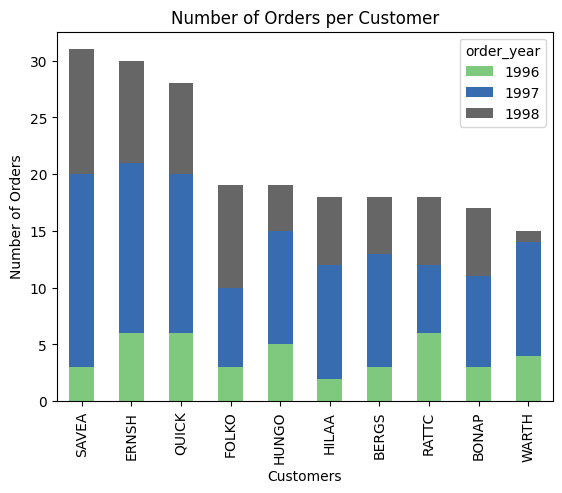

In [15]:
import matplotlib.pyplot as plt

# Plotting the pivot table
df_top_10_customers.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Number of Orders per Customer')
plt.ylabel('Number of Orders')
plt.xlabel('Customers')
plt.show()